## Exploring Target Variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

In [3]:
df = pd.read_excel('clean_data_withOHE.xls')

In [5]:
df.shape

(26664, 30)

In [9]:
df['default payment next month'].value_counts()

0    20750
1     5914
Name: default payment next month, dtype: int64

## Univariate Feature Selection

### F-test

In [10]:
features_response = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

In [16]:
X = df[features_response].iloc[:,:-1]

In [17]:
X.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,1,24,2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,26,-1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,34,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,1,37,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,2,1,57,-1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [21]:
y = df[features_response].iloc[:,-1]

In [23]:
print(X.shape, y.shape)

(26664, 17) (26664,)


In [24]:
from sklearn.feature_selection import f_classif

In [25]:
[f_stat, f_p_value] = f_classif(X,y)

In [26]:
f_df = pd.DataFrame({'Feature': features_response[:-1], 'F statistics': f_stat, 'p-value': f_p_value })

In [27]:
f_df.sort_values('p-value')

,Feature,F statistics,p-value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


#### Selecting the top 20% of features

In [29]:
from sklearn.feature_selection import SelectPercentile

In [30]:
selector = SelectPercentile(f_classif, percentile=20)

In [31]:
selector.fit(X,y)

SelectPercentile(percentile=20,
         score_func=<function f_classif at 0x000001E0CBE11E18>)

In [32]:
features = features_response[:-1]
best = selector.get_support()

C:\Users\tusha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [34]:
best_features = [features[counter] for counter in range(len(features)) if best[counter]]

In [35]:
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

### Relationship between features and response

In [36]:
overall_default_rate = df['default payment next month'].mean()

In [37]:
overall_default_rate

0.2217971797179718

In [38]:
groupby_pay = df.groupby('PAY_1').agg({'default payment next month':'mean'}) 

In [40]:
groupby_pay

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


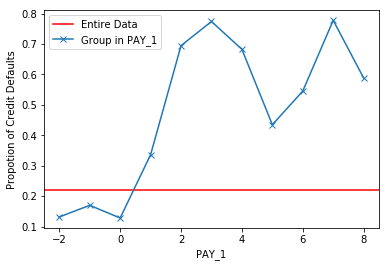

In [44]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
groupby_pay.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Propotion of Credit Defaults')
axes.legend(['Entire Data', 'Group in PAY_1'])

This shows that those who defaulted before, are likely to default again. Atleast 30% of the accounts that defaulted the previous month will default the next month